Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Rebecca"
COLLABORATORS = "None"

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [2]:
import time
import timeit
import random
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        # while we have not exhausted the indices list,
        (frm, to) = indices.pop() # pop the tuple: this will produce first the last-index of the list,
                                  # followed by the first-index of the list
        if frm == to:
            continue # if the indices are the same, continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)

# PERSONAL ADDITION: Cormen "randomized partition" + "randomized quicksort"
def Cormen_randomized_partition(A, p, r):
    # Produces 2 subproblems with total size n-1
    i = np.random.choice(p, r) # randomly choose either the first or last element
    A[r], A[i] = A[i], A[r] # swap the last element with whatever was chosen
    return Cormen_randomized_partition(A, p, r)

def Cormen_randomized_quicksort(A, p, r):
    if p < r: # if index of first element is smaller than last,
        q = Cormen_randomized_partition(A, p, r)
        Cormen_randomized_quicksort(A, p, q-2)
        Cormen_randomized_quicksort(A, q-2, r)

def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.08329874999999998


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

(See notes in code). Cormen first partitions, where this code goes straight to call q_sort after shuffling.

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

ValueError: x and y must have same first dimension, but have shapes (100,) and (101,)

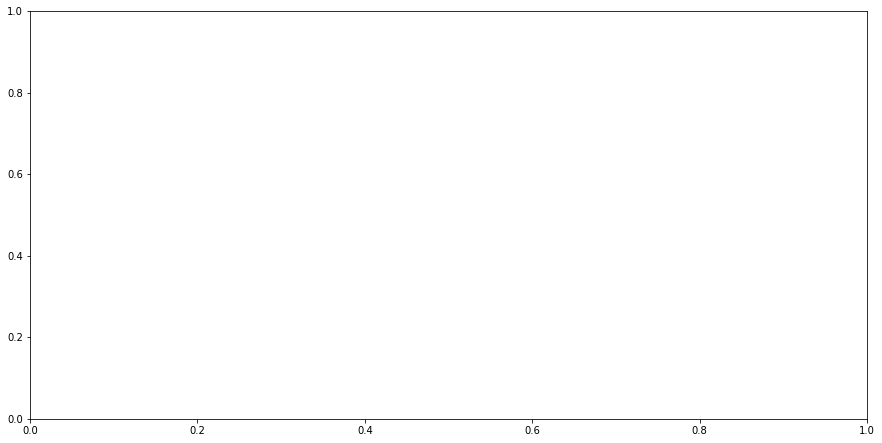

In [3]:
def randomListGenerator(n):
    A=[]
    for i in range(n):
        A.append(random.randint(1,100)) # Generate a random number between 0 and 100
    return A 

times = []

for i in range(101):
    A = randomListGenerator(i) # Generate a random list of 100 elements to sort
    start = time.time()                  
    randomized_quicksort()
    end = time.time()
    time_difference = end - start              
    times.append(time_difference)
    
x = np.linspace(1,101,100).astype(int)
plt.figure(figsize=(15,7.5))
plt.plot(x, times, color='red', label='Runtime of randomized_qsort')    
plt.title('Practical runtime comparison of randomized_qsort for lists of difference lengths')
plt.xlabel('Number of inputs')
plt.ylabel('Runtime (s.)')
plt.legend()
plt.show()

## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [ ]:
def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]

        ind1 = frm + len(lower)
        ind2 = to - len(upper)

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * (ind2 - ind1)
        lst[ind2:to] = upper
    
        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
     
    return lst

In [ ]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [ ]:
# PLOT IS NOT FUNCTIONING...
raise NotImplementedError()

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [ ]:
def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        partition = lst[frm]
        

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
        
    return lst

In [ ]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



In [ ]:
# [INCOMPLETE]
raise NotImplementedError()

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


At each partitioning, we make two recursive calls. Therefore, the total number of recursive calls would be 2^1+2^2+2^3+...+2^log2n.